C:\Users\Afif Alaudin\AppData\Local\Temp\ipykernel_20112\1923496664.py:53: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, 1)


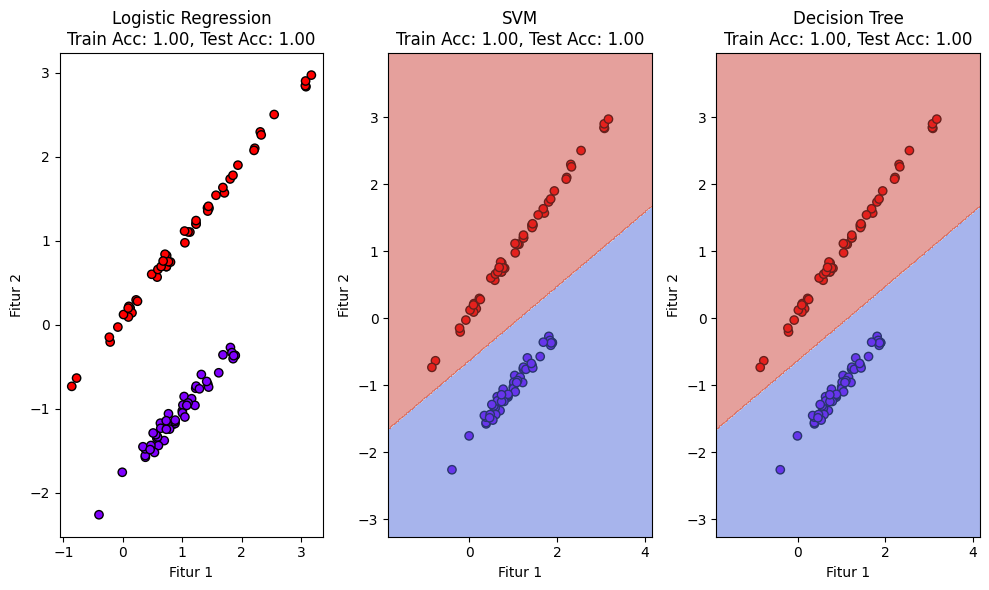

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Membuat dataset sintetis dengan 2 fitur
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, random_state=42)

# Memisahkan data menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model Logistic Regression
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)
log_reg_train_acc = accuracy_score(y_train, log_reg_model.predict(X_train))
log_reg_test_acc = accuracy_score(y_test, log_reg_model.predict(X_test))

# Membuat model Support Vector Machine (SVM)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
svm_train_acc = accuracy_score(y_train, svm_model.predict(X_train))
svm_test_acc = accuracy_score(y_test, svm_model.predict(X_test))

# Membuat model Decision Tree
tree_model = DecisionTreeClassifier(max_depth=2)
tree_model.fit(X_train, y_train)
tree_train_acc = accuracy_score(y_train, tree_model.predict(X_train))
tree_test_acc = accuracy_score(y_test, tree_model.predict(X_test))

# Membuat plot untuk membandingkan performa model
plt.figure(figsize=(10, 6))

# Plot data asli
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow', edgecolors='k')
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.title('Data Asli')

# Plot garis pembatas model Logistic Regression
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = log_reg_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.5, cmap='coolwarm')

plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow', edgecolors='k')
plt.title(f'Logistic Regression\nTrain Acc: {log_reg_train_acc:.2f}, Test Acc: {log_reg_test_acc:.2f}')
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')

# Plot garis pembatas model SVM
plt.subplot(1, 3, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow', edgecolors='k')
plt.contourf(xx, yy, Z, alpha=0.5, cmap='coolwarm')
plt.title(f'SVM\nTrain Acc: {svm_train_acc:.2f}, Test Acc: {svm_test_acc:.2f}')
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')

# Plot garis pembatas model Decision Tree
plt.subplot(1, 3, 3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow', edgecolors='k')
plt.contourf(xx, yy, Z, alpha=0.5, cmap='coolwarm')
plt.title(f'Decision Tree\nTrain Acc: {tree_train_acc:.2f}, Test Acc: {tree_test_acc:.2f}')
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')

plt.tight_layout()
plt.show()


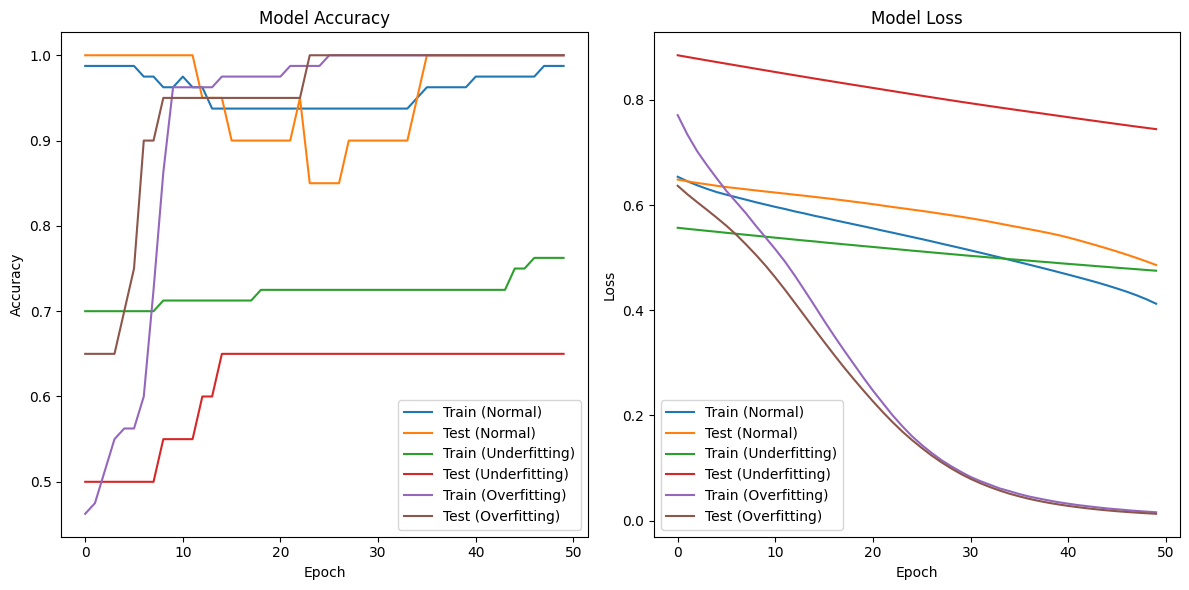

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Membuat dataset sintetis dengan 2 fitur
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, random_state=42)

# Memisahkan data menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model normal (baik)
model_normal = Sequential()
model_normal.add(Dense(8, input_dim=2, activation='relu'))
model_normal.add(Dense(8, activation='relu'))
model_normal.add(Dense(1, activation='sigmoid'))
model_normal.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history_normal = model_normal.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=0)

# Model underfitting
model_underfitting = Sequential()
model_underfitting.add(Dense(1, input_dim=2, activation='sigmoid'))
model_underfitting.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history_underfitting = model_underfitting.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=0)

# Model overfitting
model_overfitting = Sequential()
model_overfitting.add(Dense(32, input_dim=2, activation='relu'))
model_overfitting.add(Dense(32, activation='relu'))
model_overfitting.add(Dense(32, activation='relu'))
model_overfitting.add(Dense(1, activation='sigmoid'))
model_overfitting.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history_overfitting = model_overfitting.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=0)

# Plot accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_normal.history['accuracy'], label='Train (Normal)')
plt.plot(history_normal.history['val_accuracy'], label='Test (Normal)')
plt.plot(history_underfitting.history['accuracy'], label='Train (Underfitting)')
plt.plot(history_underfitting.history['val_accuracy'], label='Test (Underfitting)')
plt.plot(history_overfitting.history['accuracy'], label='Train (Overfitting)')
plt.plot(history_overfitting.history['val_accuracy'], label='Test (Overfitting)')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_normal.history['loss'], label='Train (Normal)')
plt.plot(history_normal.history['val_loss'], label='Test (Normal)')
plt.plot(history_underfitting.history['loss'], label='Train (Underfitting)')
plt.plot(history_underfitting.history['val_loss'], label='Test (Underfitting)')
plt.plot(history_overfitting.history['loss'], label='Train (Overfitting)')
plt.plot(history_overfitting.history['val_loss'], label='Test (Overfitting)')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


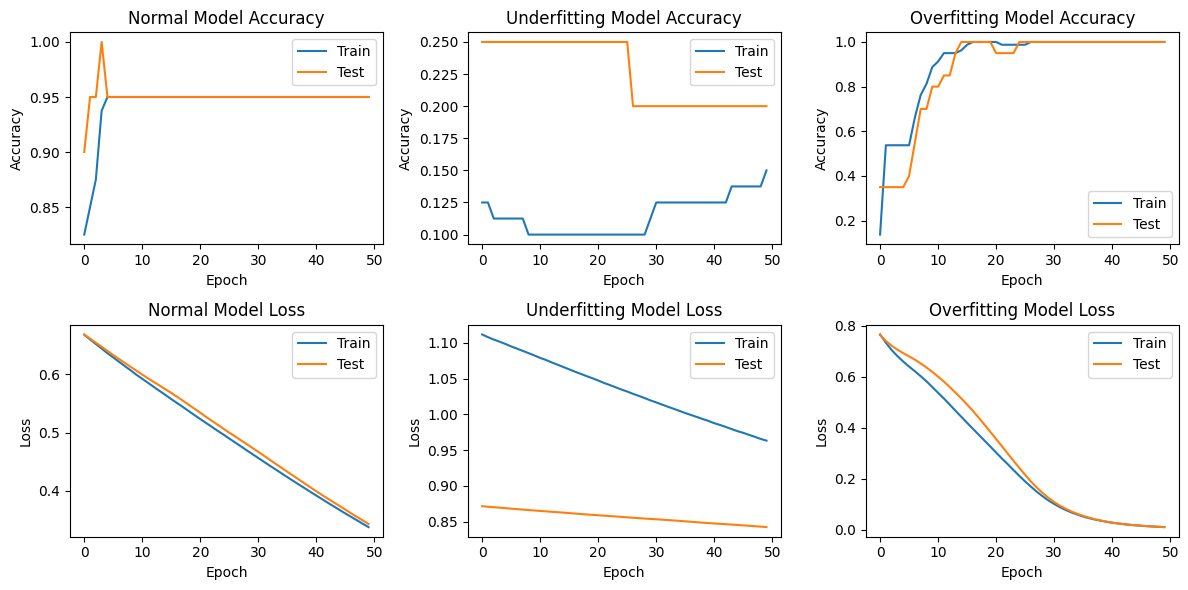

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Membuat dataset sintetis dengan 2 fitur
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, random_state=42)

# Memisahkan data menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model normal (baik)
model_normal = Sequential()
model_normal.add(Dense(8, input_dim=2, activation='relu'))
model_normal.add(Dense(8, activation='relu'))
model_normal.add(Dense(1, activation='sigmoid'))
model_normal.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history_normal = model_normal.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=0)

# Model underfitting
model_underfitting = Sequential()
model_underfitting.add(Dense(1, input_dim=2, activation='sigmoid'))
model_underfitting.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history_underfitting = model_underfitting.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=0)

# Model overfitting
model_overfitting = Sequential()
model_overfitting.add(Dense(32, input_dim=2, activation='relu'))
model_overfitting.add(Dense(32, activation='relu'))
model_overfitting.add(Dense(32, activation='relu'))
model_overfitting.add(Dense(1, activation='sigmoid'))
model_overfitting.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history_overfitting = model_overfitting.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=0)

# Plot accuracy dan loss untuk model normal
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.plot(history_normal.history['accuracy'], label='Train')
plt.plot(history_normal.history['val_accuracy'], label='Test')
plt.title('Normal Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(2, 3, 4)
plt.plot(history_normal.history['loss'], label='Train')
plt.plot(history_normal.history['val_loss'], label='Test')
plt.title('Normal Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy dan loss untuk model underfitting
plt.subplot(2, 3, 2)
plt.plot(history_underfitting.history['accuracy'], label='Train')
plt.plot(history_underfitting.history['val_accuracy'], label='Test')
plt.title('Underfitting Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(2, 3, 5)
plt.plot(history_underfitting.history['loss'], label='Train')
plt.plot(history_underfitting.history['val_loss'], label='Test')
plt.title('Underfitting Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy dan loss untuk model overfitting
plt.subplot(2, 3, 3)
plt.plot(history_overfitting.history['accuracy'], label='Train')
plt.plot(history_overfitting.history['val_accuracy'], label='Test')
plt.title('Overfitting Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(2, 3, 6)
plt.plot(history_overfitting.history['loss'], label='Train')
plt.plot(history_overfitting.history['val_loss'], label='Test')
plt.title('Overfitting Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


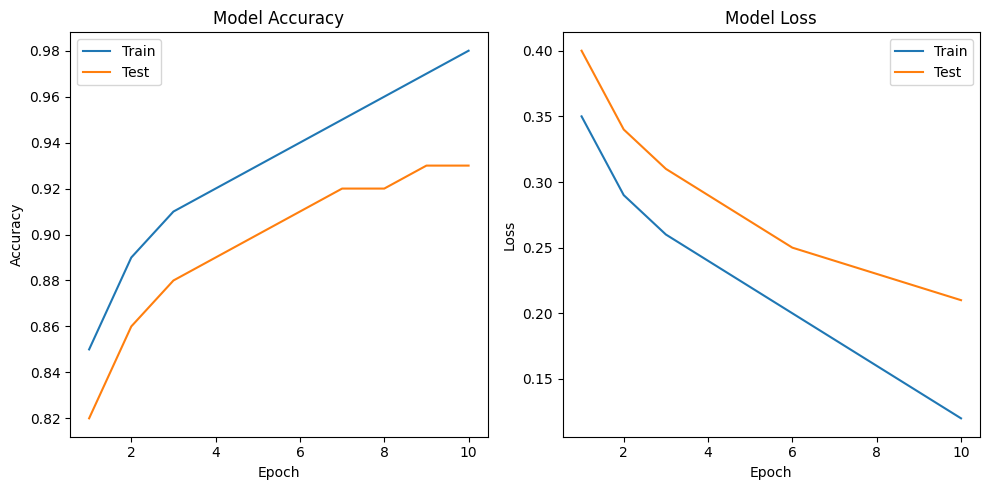

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Data simulasi untuk contoh plot
epochs = np.arange(1, 11)
train_accuracy = [0.85, 0.89, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98]
test_accuracy = [0.82, 0.86, 0.88, 0.89, 0.90, 0.91, 0.92, 0.92, 0.93, 0.93]
train_loss = [0.35, 0.29, 0.26, 0.24, 0.22, 0.20, 0.18, 0.16, 0.14, 0.12]
test_loss = [0.40, 0.34, 0.31, 0.29, 0.27, 0.25, 0.24, 0.23, 0.22, 0.21]

# Plot accuracy
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, label='Train')
plt.plot(epochs, test_accuracy, label='Test')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Train')
plt.plot(epochs, test_loss, label='Test')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


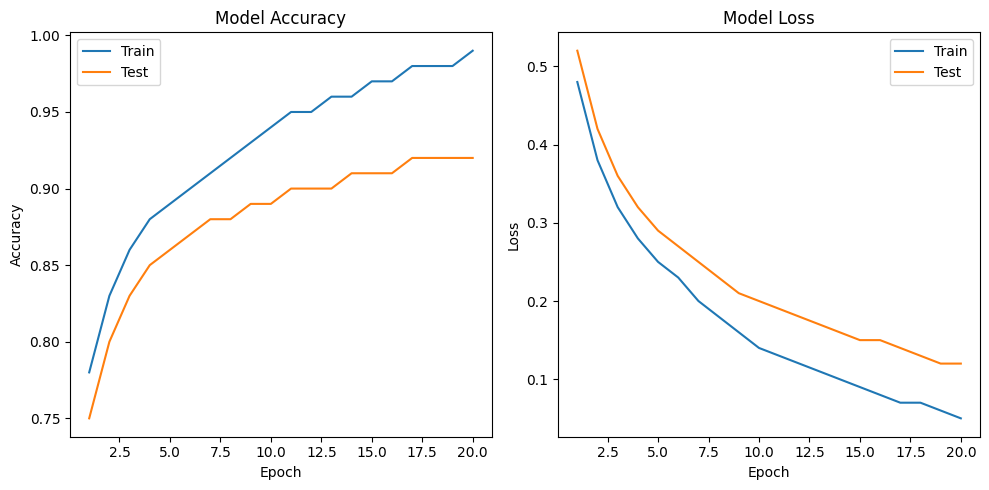

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Data simulasi untuk contoh plot
epochs = np.arange(1, 21)
train_accuracy = [0.78, 0.83, 0.86, 0.88, 0.89, 0.90, 0.91, 0.92, 0.93, 0.94, 0.95, 0.95, 0.96, 0.96, 0.97, 0.97, 0.98, 0.98, 0.98, 0.99]
test_accuracy = [0.75, 0.80, 0.83, 0.85, 0.86, 0.87, 0.88, 0.88, 0.89, 0.89, 0.90, 0.90, 0.90, 0.91, 0.91, 0.91, 0.92, 0.92, 0.92, 0.92]
train_loss = [0.48, 0.38, 0.32, 0.28, 0.25, 0.23, 0.20, 0.18, 0.16, 0.14, 0.13, 0.12, 0.11, 0.10, 0.09, 0.08, 0.07, 0.07, 0.06, 0.05]
test_loss = [0.52, 0.42, 0.36, 0.32, 0.29, 0.27, 0.25, 0.23, 0.21, 0.20, 0.19, 0.18, 0.17, 0.16, 0.15, 0.15, 0.14, 0.13, 0.12, 0.12]

# Plot accuracy
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, label='Train')
plt.plot(epochs, test_accuracy, label='Test')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Train')
plt.plot(epochs, test_loss, label='Test')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


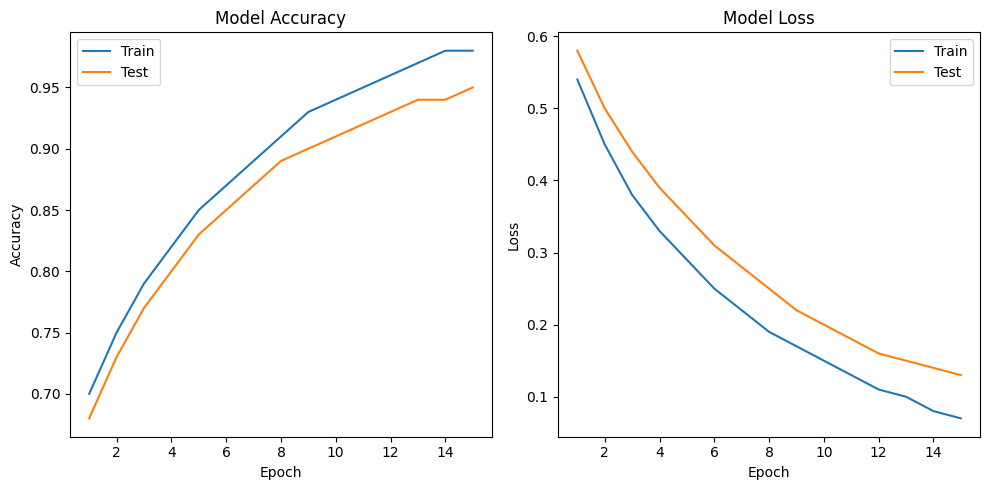

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Data simulasi untuk contoh plot
epochs = np.arange(1, 16)
train_accuracy = [0.70, 0.75, 0.79, 0.82, 0.85, 0.87, 0.89, 0.91, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.98]
test_accuracy = [0.68, 0.73, 0.77, 0.80, 0.83, 0.85, 0.87, 0.89, 0.90, 0.91, 0.92, 0.93, 0.94, 0.94, 0.95]
train_loss = [0.54, 0.45, 0.38, 0.33, 0.29, 0.25, 0.22, 0.19, 0.17, 0.15, 0.13, 0.11, 0.10, 0.08, 0.07]
test_loss = [0.58, 0.50, 0.44, 0.39, 0.35, 0.31, 0.28, 0.25, 0.22, 0.20, 0.18, 0.16, 0.15, 0.14, 0.13]

# Plot accuracy
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, label='Train')
plt.plot(epochs, test_accuracy, label='Test')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Train')
plt.plot(epochs, test_loss, label='Test')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
